Find all Census Block Groups in Bloomington, IN.

In [1]:
# EXAMPLES: http://andrewgaidus.com/Dot_Density_County_Maps/

import geojson
import pandas as pd
import altair as alt
import pprint

In [ ]:
# Get count of devices residing in each CBG on 07/22/2019
devices_residing07222019 = pd.read_csv('../home_panels/2019-07-22-home-panel-summary.csv')

devices_residing07222019 = devices_residing07222019.rename(columns={'number_devices_residing': 'devices07222019'})
devices_residing07222019 = devices_residing07222019.drop(['date_range_start', 'date_range_end', 'state'], axis=1)

devices_residing07222019.tail()

In [ ]:
# Get count of devices residing in each CBG on 02/03/2020
devices_residing02032020 = pd.read_csv('../home_panels/2020-02-03-home-panel-summary.csv')

devices_residing02032020 = devices_residing02032020.rename(columns={'number_devices_residing': 'devices02032020'})
devices_residing02032020 = devices_residing02032020.drop(['date_range_start', 'date_range_end', 'state'], axis=1)

devices_residing02032020.tail()

In [ ]:
# Create a list of unique Census Block Groups for Bloomington, IN
bton_cbgs = pd.read_csv('bloomington_cbgs.csv')
bton_cbgs.drop_duplicates('census_block_group', keep=False, inplace=True)
bton_cbgs.count

In [ ]:
# Merge dataframes so we have one dataframe that includes summer and winter population, population change, and percent change
filtered_2019_df = pd.merge(bton_cbgs, devices_residing07222019, on=['census_block_group'])
filtered_2020_df = pd.merge(devices_residing02032020, bton_cbgs, how='inner')

bton_devices_residing = pd.merge(filtered_2019_df, filtered_2020_df, how='left', on='census_block_group')

bton_devices_residing['pop_change'] = bton_devices_residing['devices02032020'] - bton_devices_residing['devices07222019']
bton_devices_residing['pop_pct_change'] = bton_devices_residing['pop_change'] / bton_devices_residing['devices07222019']

bton_devices_residing

In [ ]:
# Create a dataframe that only contains CBGs where the population increased by more than 100% from summer to winter
bton_transient_df = bton_devices_residing[bton_devices_residing['pop_pct_change'] > 1]
bton_transient_df

In [ ]:
bton_transient_df.to_csv('bton_transient_cbgs.csv')

In [ ]:
# Create a dataframe that only contains CBGs where the population increased by more than 100% from summer to winter
bton_static_df = bton_devices_residing[bton_devices_residing['pop_pct_change'] <= 1]
bton_static_df

In [ ]:
bton_static_df.to_csv('bton_static_cbgs.csv')

I now have two dataframes: one that includes the more transient census block groups (e.g. 'students') and one that is more static (e.g. year-round residents.)

# Maps of Monroe County, IN

In [10]:
# Import the geo_json from the Safegraph Open Census Data
url_geojson = '../open_census/safegraph_open_census_data/geometry/temp_small.geojson'
data_geojson_remote = alt.Data(url=url_geojson, format=alt.DataFormat(property='features',type='json'))


Data({
  format: DataFormat({
    property: 'features',
    type: 'json'
  }),
  url: '../open_census/safegraph_open_census_data/geometry/temp_small.geojson'
})


Data({
  format: DataFormat({
    property: 'features',
    type: 'json'
  }),
  url: '../open_census/safegraph_open_census_data/geometry/temp_small.geojson'
})


In [13]:
# inline geojson data object
data_geojson = alt.InlineData(values=url_geojson, format=alt.DataFormat(property='features',type='json')) 

# chart object
alt.Chart(data_geojson).mark_geoshape(
).encode(
    color="properties.CensusBureauGroup:N"
).properties(
    projection={'type': 'identity', 'reflectY': True}
)

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [3]:
# https://stackoverflow.com/questions/55923300/how-can-i-make-a-map-using-geojson-data-in-altair
feature_1 = geojson.Feature(
    geometry=geojson.Polygon([[[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]]),
    properties={"name":"abc"}
)
feature_2 = geojson.Feature(
    geometry=geojson.Polygon([[[1, 0], [2, 0], [2, 1], [1, 1], [1, 0]]]),
    properties={"name":"def"}
)
var_geojson = geojson.FeatureCollection([feature_1, feature_2])
pprint.pprint(var_geojson)

{'features': [{'geometry': {'coordinates': [[[0, 0],
                                             [1, 0],
                                             [1, 1],
                                             [0, 1],
                                             [0, 0]]],
                            'type': 'Polygon'},
               'properties': {'name': 'abc'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[1, 0],
                                             [2, 0],
                                             [2, 1],
                                             [1, 1],
                                             [1, 0]]],
                            'type': 'Polygon'},
               'properties': {'name': 'def'},
               'type': 'Feature'}],
 'type': 'FeatureCollection'}


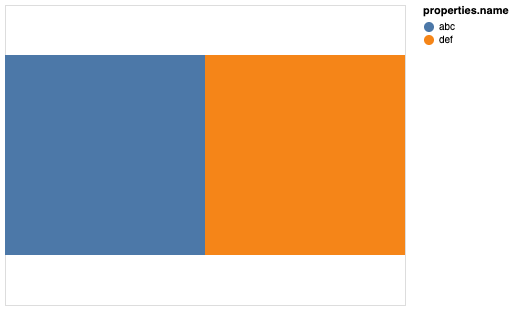

In [4]:
# inline geojson data object
data_geojson = alt.InlineData(values=var_geojson, format=alt.DataFormat(property='features',type='json')) 

# chart object
alt.Chart(data_geojson).mark_geoshape(
).encode(
    color="properties.name:N"
).properties(
    projection={'type': 'identity', 'reflectY': True}
)